# Importing Dependencies

In [42]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
df=pd.read_csv("/home/preethugangolli/ml/card_transdata.csv")

In [3]:
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [4]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(1000000, 8)

In [6]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
# Checking distribution of numerical values in the dataset
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
# Checking the class distribution of the target variable
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

fraud
0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64


<AxesSubplot:ylabel='fraud'>

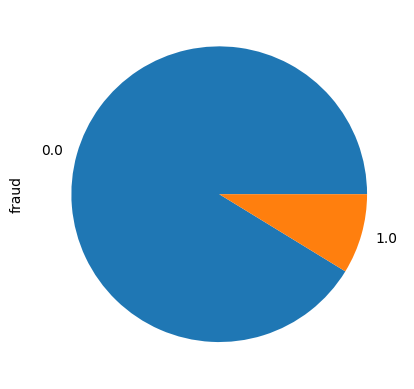

In [10]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('fraud')['fraud'].count()/df['fraud'].count()) *100)
((df.groupby('fraud')['fraud'].count()/df['fraud'].count()) *100).plot.pie()

In [11]:
x = df.drop('fraud', axis = 1).values
y = df['fraud'].values

In [12]:
# Checking the correlation
corr = df.corr()
corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


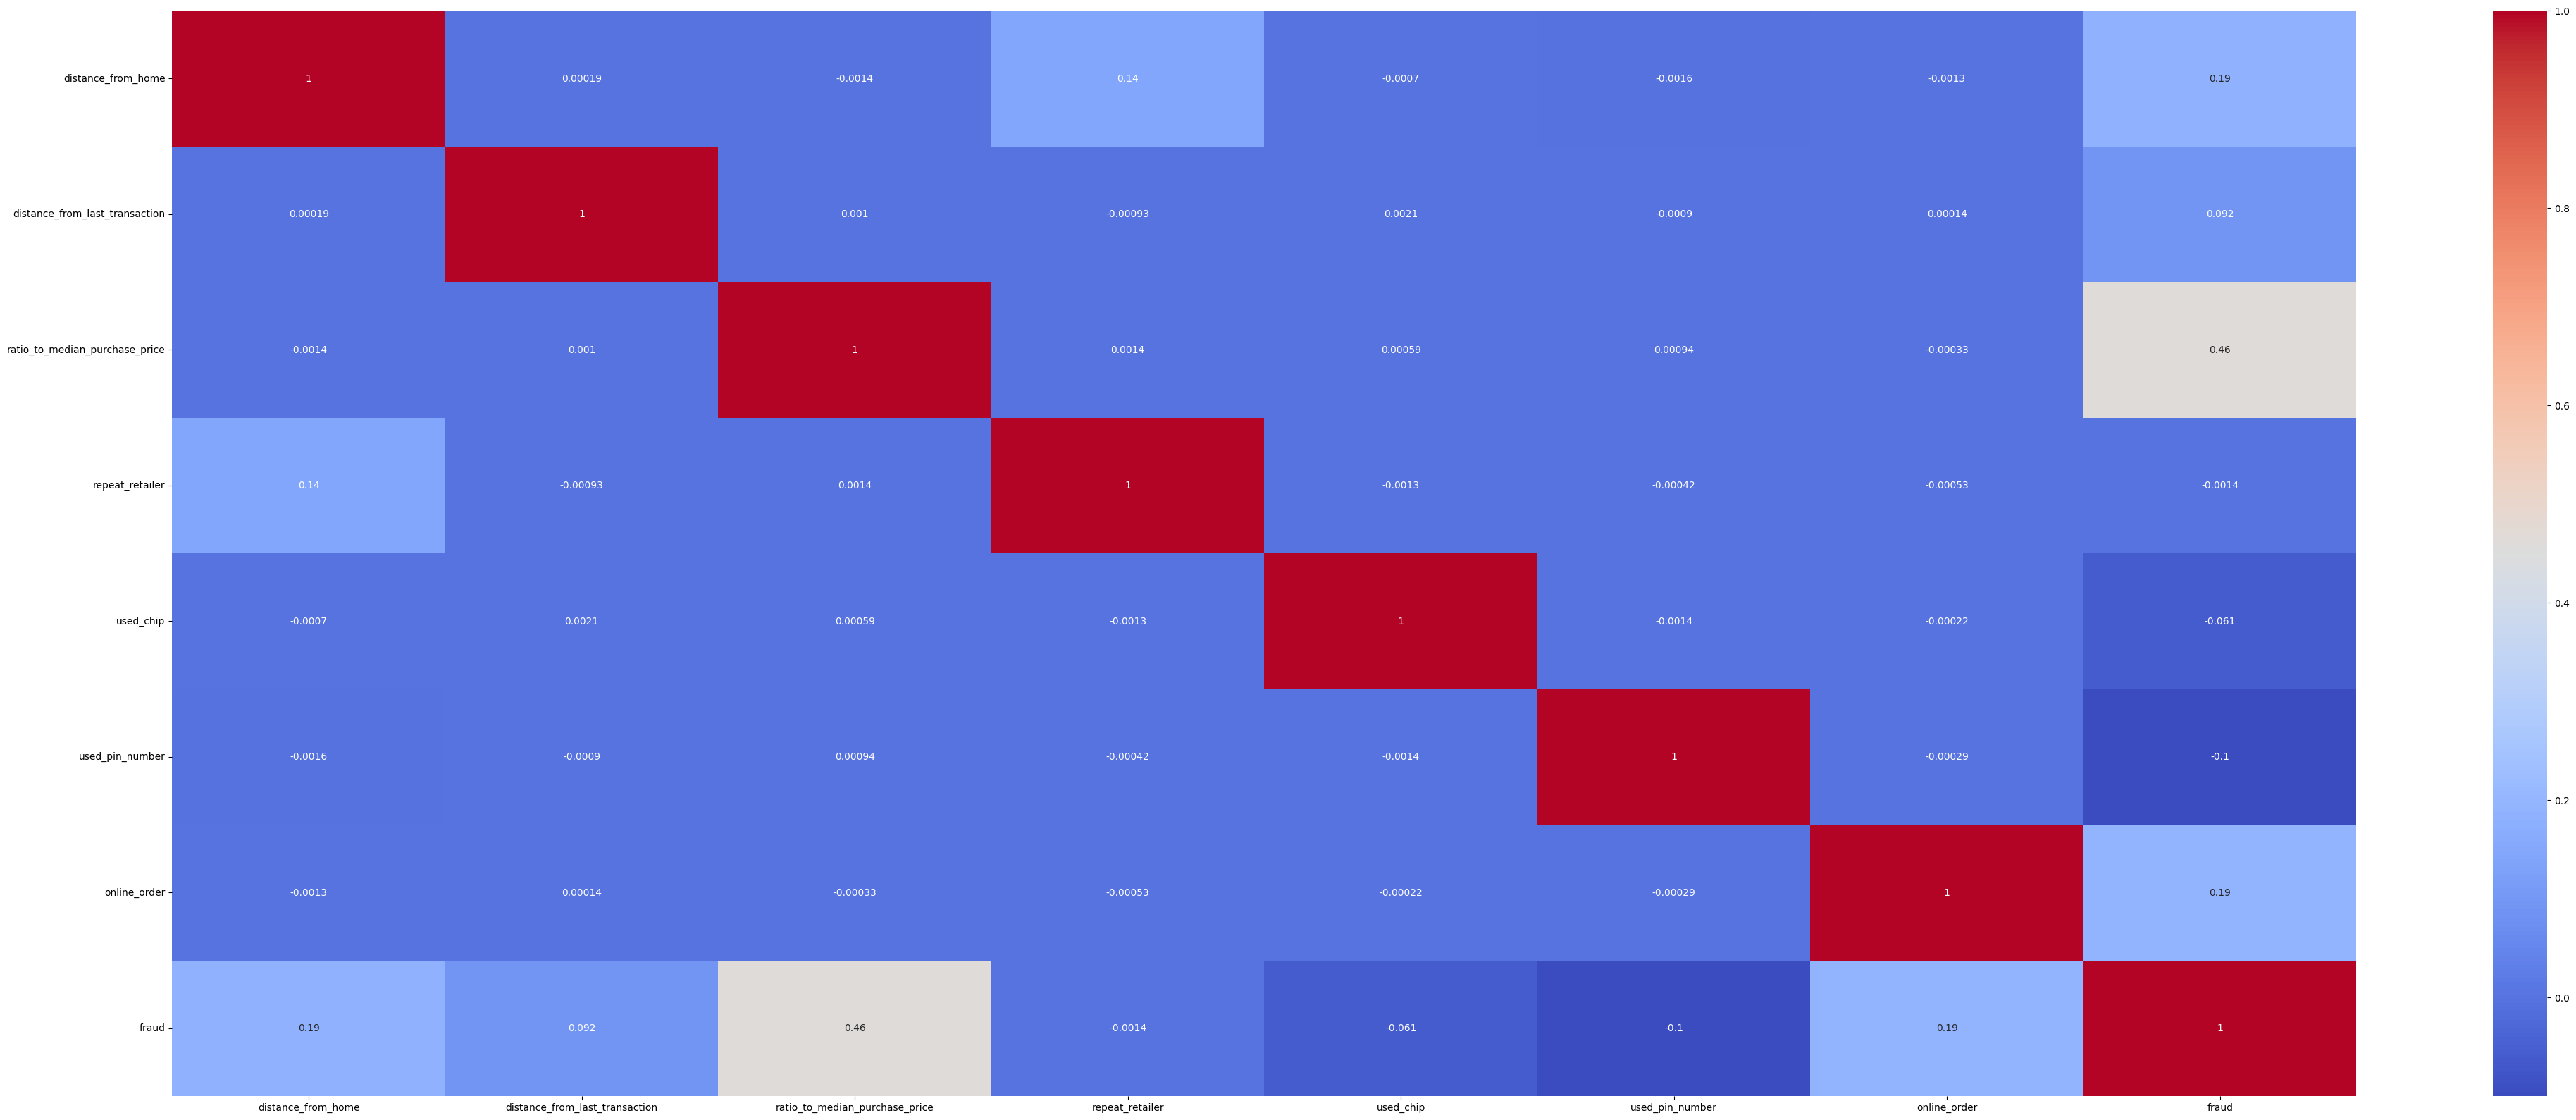

In [13]:
# Checking the correlation in heatmap
plt.figure(figsize=(50,20))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
# DATA SPLIT
X = df.drop('fraud', axis = 1).values
y = df['fraud'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_s
print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

# Outliers and  BoxPlot 

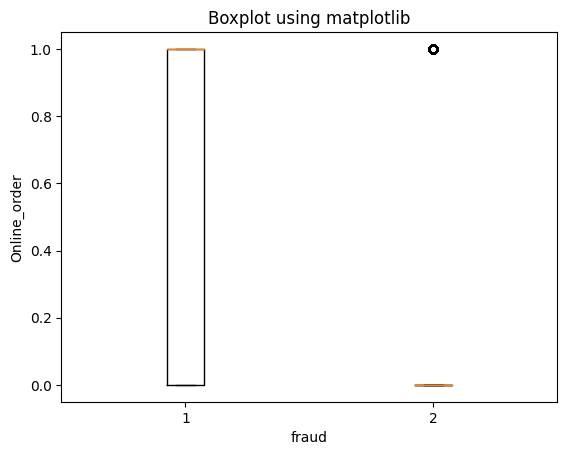

In [14]:
# Creating boxplot for fraud data
plt.boxplot(df[['online_order', 'fraud']])
plt.title("Boxplot using matplotlib")
plt.xlabel('fraud')
plt.ylabel('Online_order')
plt.show()

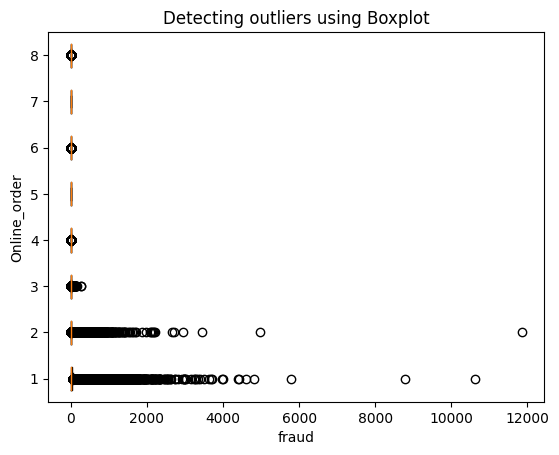

In [15]:
plt.boxplot(df, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('fraud')
plt.ylabel('Online_order')
plt.show()

<AxesSubplot:title={'center':'Boxplot'}, xlabel='fraud', ylabel='fraud'>

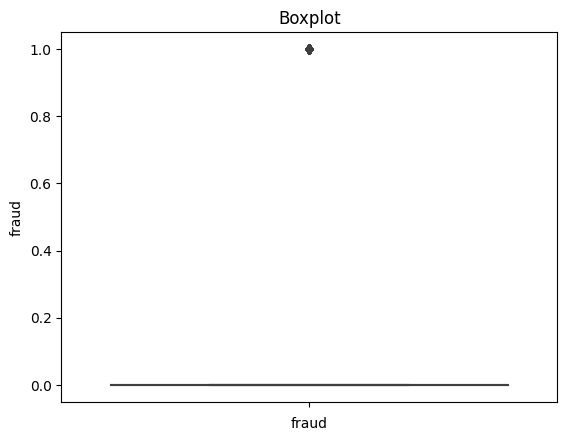

In [16]:
# Box Plot to find more information about it's Quartiles and also detect Outliers plt.figure(figsize = (5, 5)) 
plt.title('Boxplot')
plt.xlabel('fraud')
plt.ylabel('Online_order')
sns.boxplot(y = df.fraud)

In [17]:
# Checking the % distribution of normal vs fraud
classes=df['fraud'].value_counts()
normal_share=classes[0]/df['fraud'].count()*100
fraud_share=classes[1]/df['fraud'].count()*100

print(normal_share)
print(fraud_share)

91.2597
8.7403


(0, 8)


<AxesSubplot:title={'center':'Fraud Transaction'}, ylabel='fraud'>

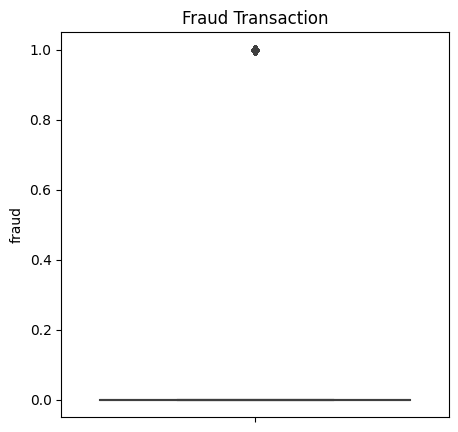

In [18]:
Q1 = df.fraud.quantile(0.25) 
Q3 = df. fraud.quantile(0.75) 
IQR = Q3 - Q1 
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 
Data_outliers=df[(df. fraud<lower_limit)&(df. fraud>upper_limit)] 
print(Data_outliers.shape) 
data=df[(df.fraud>lower_limit)&(df. fraud>upper_limit) ]#dropping the outliers from dataset 
plt. figure(figsize = (5,5)) 
plt.title('Fraud Transaction') 
sns.boxplot(y = df.fraud)

/home/preethugangolli/preethu_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


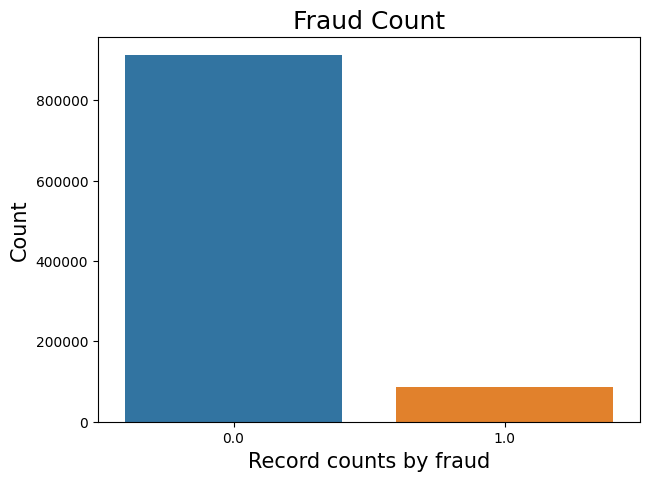

In [61]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['fraud'])
plt.title("Fraud Count", fontsize=18)
plt.xlabel("Record counts by fraud", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [19]:
# compare the values for both transactions
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [20]:
# compare the values for both transactions
df.groupby('fraud').median()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,9.673847,0.985074,0.913950,1.0,0.0,0.0,1.0
1.0,15.454219,1.157631,5.071294,1.0,0.0,0.0,1.0


# Splitting the data into train & test data 

In [21]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [22]:
# Checking some rows of X
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [23]:
# Checking some rows of y
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

In [24]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [25]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

87403.0
65443.0
21960.0


# Model Building

In [26]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [28]:
#Evaluate Decision Tree model with 'entropy'
criteria = ['gini', 'entropy'] 
scores = {} 

for c in criteria: 
  dt = DecisionTreeClassifier(criterion = c, random_state=42) 
  dt.fit(X_train, y_train) 
  tr_predict = dt.predict(X_test)
  
  test_score = dt.score(X_test, y_test) 
  tree_preds = dt.predict_proba(X_test)[:, 1]
    
  tree_roc_value = roc_auc_score(y_test, tree_preds)
  scores = test_score 
  print(c + " score: {0}" .format(test_score))

#   print("Confusion Matrix")
#   Plot_confusion_matrix(y_test, y_predict)

  print("classification Report")
  print(classification_report(y_test, tr_predict))

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, tr_predict)))

print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, tr_predict)))

# confusion matrix
confusion_matrix(y_test, tr_predict)

gini score: 0.99997
classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182383
         1.0       1.00      1.00      1.00     17617

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

entropy score: 0.999985
classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182383
         1.0       1.00      1.00      1.00     17617

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Accuracy score of the Logistic Regression model is 0.999985
F1 score of the Logistic Regression model is 0.9999148525530044


array([[182382,      1],
       [     2,  17615]])

In [29]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [30]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [31]:
#create KNN model and fit the model with train dataset
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
print("model score")
print(score)

#Accuracy
knn_predict = knn.predict(X_test)

KNN_Accuracy = metrics.accuracy_score(y_pred=knn_predict, y_true=y_test)
# print("Confusion Matrix")
# Plot_confusion_matrix(y_test, y_predict)

print("classification Report")
print(classification_report(y_test, knn_predict))

knn_probs = knn.predict_proba(X_test)[:, 1]

# confusion matrix
confusion_matrix(y_test, knn_predict)

model score
0.9838
classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    228040
         1.0       0.89      0.93      0.91     21960

    accuracy                           0.98    250000
   macro avg       0.94      0.96      0.95    250000
weighted avg       0.98      0.98      0.98    250000



array([[225585,   2455],
       [  1595,  20365]])

In [32]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [33]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# print("Parameters for l1 regularisations")
# print(lr.coef_)
# print(lr.intercept_) 
# print(lr.scores_)

#find predicted vallues
lr_predict = lr.predict(X_test)

#Find predicted probabilities
y_pred_probs = lr.predict_proba(X_test)[:,1]
    
# Accuaracy of models
Accuracy = metrics.accuracy_score(y_pred=lr_predict, y_true=y_test)

print("Accuarcy of Logistic model : {0}".format(Accuracy))
# print("Confusion Matrix")
# Plot_confusion_matrix(y_test, y_predict)

print("classification Report")
print(classification_report(y_test, lr_predict))

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_predict)))

print('F1 score of the Logistic Regression is {}'.format(f1_score(y_test, lr_predict)))

# confusion matrix
confusion_matrix(y_test, lr_predict)

/home/preethugangolli/preethu_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuarcy of Logistic model : 0.958996
classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228040
         1.0       0.90      0.60      0.72     21960

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

Accuracy score of the Logistic Regression model is 0.958996
F1 score of the Logistic Regression is 0.7196652719665272


array([[226591,   1449],
       [  8802,  13158]])

In [36]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [37]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [38]:
# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, 
                            bootstrap = True,
                            max_features = 'sqrt', random_state=42)
# Fit on training data
RF_model.fit(X_train, y_train)
RF_test_score = RF_model.score(X_test, y_test)
# RF_model.predict(X_test)

print('Model Accuracy: {0}'.format(RF_test_score))


# Actual class predictions
rf_predict = RF_model.predict(X_test)

# print("Confusion Matrix")
# Plot_confusion_matrix(y_test, rf_predictions)

print("classification Report")
print(classification_report(y_test, rf_predict))

# Probabilities for each class
rf_probs = RF_model.predict_proba(X_test)[:, 1]

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_predict)))

print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_predict)))

# confusion matrix
confusion_matrix(y_test,rf_predict)

Model Accuracy: 0.999992
classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228040
         1.0       1.00      1.00      1.00     21960

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000

Accuracy score of the Random Forest model is 0.999992
F1 score of the Random Forest model is 0.9999544605856369


array([[228040,      0],
       [     2,  21958]])

In [39]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [40]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [43]:
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train, y_train)
xgb_predict = XGBmodel.predict(X_test)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# print("Confusion Matrix")
# Plot_confusion_matrix(y_test, y_pred)

print("classification Report")
print(classification_report(y_test, xgb_predict))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]
    
# confusion matrix
confusion_matrix(y_test,xgb_predict)

Model Accuracy: 0.999988
classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228040
         1.0       1.00      1.00      1.00     21960

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



array([[228040,      0],
       [     3,  21957]])

In [46]:
# Splitting the dataset into X and y
y= df['fraud']
X = df.drop(['fraud'], axis=1)

In [47]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_predict)))

print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_predict)))

# Confsion matrix
confusion_matrix(y_test, predict, labels = [0, 1])

In [ ]:
# 1. Accuracy score
print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score of the Decision Tree model is
{}'.format(accuracy_score(y_test, tr_predict)))
print('------------------------------------------------------------------------')
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test,
knn_predict)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Logistic Regression model is
{}'.format(accuracy_score(y_test, lr_predict)))
print('------------------------------------------------------------------------')
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test,
svm_predict)))
print('------------------------------------------------------------------------')
print('Accuracy score of the Random Forest Tree model is
{}'.format(accuracy_score(y_test, rf_predict)))
print('------------------------------------------------------------------------')
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test,
xgb_predict)))
print('------------------------------------------------------------------------')

# Conclusion